## Pregunta: V6 - Visualización de las prioridades de los paquetes para cada versión aplicado diagrama de áreas apiladas, en orden de prioridad e importancia de required a opcionales

### 1. Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

### 2. Lectura

In [2]:
df = pd.read_csv("../../datawarehouse/processed-ubuntu-packages.csv")

### 3. Preprocesado

In [3]:
# replace value Null to NaN
df = df.replace("Null", np.nan)

# print head of dataframe
df.head()

,Distro-Version,Distro-Year,Package,Description,Section,Version,Architecture,Priority,Essential,Build-Essential,...,Original-Maintainer,Size,Installed-Size,Depends,Pre-Depends,Recommends,Conflicts,Suggests,Replaces,Provides
0,18.04 - bionic,2018,acct,Description,admin,6.6.4-1,amd64,optional,no,no,...,Debian,87216.0,297.0,"libc6 (>= 2.14), lsb-base",NaN,NaN,NaN,NaN,NaN,NaN
1,18.04 - bionic,2018,acl,Description,utils,2.2.52-3build1,amd64,optional,no,no,...,Anibal,38504.0,200.0,"libacl1 (= 2.2.52-3build1), libc6 (>= 2.14)",NaN,NaN,NaN,NaN,NaN,NaN
2,18.04 - bionic,2018,acpi-support,Description,admin,0.142,amd64,optional,no,no,...,Bart,10196.0,92.0,acpid (>= 1.0.4-1ubuntu4),NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
3,18.04 - bionic,2018,acpid,Description,admin,1:2.0.28-1ubuntu1,amd64,optional,no,no,...,Debian,36518.0,139.0,"libc6 (>= 2.15), init-system-helpers (>= 1.18~...",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
4,18.04 - bionic,2018,adduser,Description,admin,3.116ubuntu1,all,important,no,yes,...,Debian,162684.0,624.0,"passwd, debconf (>= 0.5) | debconf-2.0",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),"liblocale-gettext-perl, perl, ecryptfs-utils (...",NaN,NaN


### 4. Cálculos

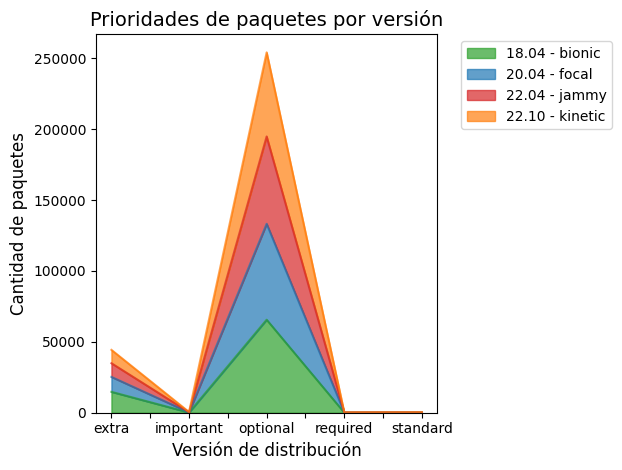

In [5]:
# Seleccionar las columnas relevantes y filtrar las filas que tienen "Priority" como "unknown"
df = df[["Distro-Version", "Version", "Package", "Priority"]]
df = df[df["Priority"] != "unknown"]

# Ordenar las filas por versión y prioridad
df = df.sort_values(by=["Distro-Version", "Priority"], ascending=[True, False])

# Crear un diccionario de colores para cada prioridad
color_dict = {"required": "#1f77b4", "important": "#ff7f0e", "standard": "#2ca02c",
              "optional": "#d62728", "extra": "#9467bd"}

# Crear un diccionario para contar la cantidad de paquetes por versión y prioridad
data_dict = {}
for version, group in df.groupby("Distro-Version"):
    data_dict[version] = {}
    for priority, sub_group in group.groupby("Priority"):
        data_dict[version][priority] = len(sub_group)

# Crear una lista de colores para cada paquete en el gráfico de áreas apiladas
colors = [color_dict[p] for p in df['Priority'].unique()]

# Crear un DataFrame de Pandas con los datos del diccionario
data_df = pd.DataFrame(data_dict)

# Crear un gráfico de áreas apiladas
ax = data_df.plot(kind="area", stacked=True, color=colors, alpha=0.7)

# Personalizar el gráfico
ax.set_title("Prioridades de paquetes por versión", fontsize=14)
ax.set_xlabel("Versión de distribución", fontsize=12)
ax.set_ylabel("Cantidad de paquetes", fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()